In [132]:
import getpass
username = getpass.getuser()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
import bandit_plots as bp

import sys
sys.path.append('/Users/lynnechantranupong/Dropbox (HMS)/2ABT_Celia/2abt_behavior-main_1/bandit_models/')
import plot_models_v_mouse as plots

%matplotlib inline
sns.set(style='ticks', font_scale=1.6, rc={'axes.labelsize':18, 'axes.titlesize':18}) 

In [133]:
# data_path =  f'/Users/{username}/Dropbox (HMS)/2ABT_Celia/widespread_tet/lynne_no_thresh_full_1_widespread_tet.csv'
# data_path =  f'/Users/{username}/Dropbox (HMS)/2ABT_Celia/vglut1_tet/lynne_no_thresh_full_1_vglut1_tet.csv'
# data_path =  f'/Users/{username}/Dropbox (HMS)/2ABT_Celia/vglut2_somatic_tet/lynne_no_thresh_full_1_vglut2_somatic_tet.csv'
# data_path =  f'/Users/{username}/Dropbox (HMS)/2ABT_Celia/temp/lynne_no_thresh_full_1back_widepsread_tetanus.csv'

data_path =  f'/Users/{username}/Dropbox (HMS)/2ABT_Celia/jax_ff_ko/lynne_no_thresh_full_1_jax_ff_ko.csv'

data=pd.read_csv(data_path, index_col=0)

data=data.rename(columns={'Block Trial':'blockTrial', 'Current Block Length':'blockLength', 'TargetPort':'Target', 'Higher p port':'highPort'})

mice = data['Mouse ID'].unique()

data['block_pos_rev'] = data['blockTrial'] - data['blockLength'] # reverse block position from transition


In [134]:
mice

array(['S1355', 'S1356', 'S1357', 'S1358', 'S1399', 'S1400', 'S1401',
       'S1374', 'S1376', 'S1416', 'S1417', 'S1418', 'S1419', 'S1420',
       'S1421', 'S1422', 'S1459', 'S1460', 'S1461', 'S1462', 'S1471',
       'S1472', 'S1473'], dtype=object)

In [135]:
data['Session ID'].unique()

array(['S1355_03172022', 'S1355_03212022', 'S1355_03252022',
       'S1355_03312022', 'S1356_03172022', 'S1356_03212022',
       'S1356_03252022', 'S1356_03312022', 'S1357_03172022',
       'S1357_03212022', 'S1357_03232022', 'S1357_03252022',
       'S1357_03292022', 'S1357_03312022', 'S1358_03172022',
       'S1358_03212022', 'S1358_03232022', 'S1358_03252022',
       'S1358_03292022', 'S1399_05102022', 'S1399_05122022',
       'S1399_05162022', 'S1400_05102022', 'S1400_05122022',
       'S1400_05162022', 'S1401_05102022', 'S1401_05122022',
       'S1401_05162022', 'S1374_04112022', 'S1374_04132022',
       'S1374_04152022', 'S1376_03282022', 'S1376_03302022',
       'S1376_04012022', 'S1376_04032022', 'S1376_04052022',
       'S1376_04072022', 'S1416_05232022', 'S1416_05252022',
       'S1416_05272022', 'S1416_05302022', 'S1417_05232022',
       'S1417_05252022', 'S1417_05272022', 'S1417_05302022',
       'S1418_05232022', 'S1418_05252022', 'S1418_05272022',
       'S1419_05232022',

In [136]:
data.columns

Index(['Trial', 'blockTrial', '0_ITI', '0_trialDuration', 'Decision', '1_Port',
       '1_Reward', '1_ITI', '1_trialDuration', 'Switch', 'highPort', 'Reward',
       'Mouse ID', 'Session ID', 'Condition', 'laser_stim', 'Target',
       'Block ID', 'blockLength', 'session_pos', 'treatment', 'block_pos_rev'],
      dtype='object')

# plotting behavior around block transitions

In [137]:
# df=bp.get_trials_block_transitions(data, divide_by='Mouse ID')
# df

In [138]:
data.columns

Index(['Trial', 'blockTrial', '0_ITI', '0_trialDuration', 'Decision', '1_Port',
       '1_Reward', '1_ITI', '1_trialDuration', 'Switch', 'highPort', 'Reward',
       'Mouse ID', 'Session ID', 'Condition', 'laser_stim', 'Target',
       'Block ID', 'blockLength', 'session_pos', 'treatment', 'block_pos_rev'],
      dtype='object')

In [139]:
def bpos_summaries_by_condition(data, condition='Mouse ID'):

    condition_labels = data[condition].unique()

    bpos = pd.DataFrame()
    for c in condition_labels:
        
        d_ = data.loc[data[condition]==c]

        bpos_tmp = plots.get_block_position_summaries(d_)

        bpos_tmp['condition'] = c
        bpos_tmp['treatment'] = d_.treatment.unique().squeeze()

        bpos = pd.concat((bpos, bpos_tmp), ignore_index=True)  

    return bpos

df_aggregate = plots.get_block_position_summaries(data)

In [140]:
df = bpos_summaries_by_condition(data)
df

,block_pos,phigh,phigh_std,pswitch,pswitch_std,n,condition,treatment
0,-30,0.909091,0.294245,0.181818,0.394771,22,S1355,jax
1,-29,0.909091,0.294245,0.090909,0.294245,22,S1355,jax
2,-28,1.000000,0.000000,0.090909,0.294245,22,S1355,jax
3,-27,0.909091,0.294245,0.090909,0.294245,22,S1355,jax
4,-26,0.818182,0.394771,0.272727,0.455842,22,S1355,jax
...,...,...,...,...,...,...,...,...
1398,26,0.833333,0.380693,0.416667,0.503610,24,S1473,ff
1399,27,0.666667,0.481543,0.333333,0.481543,24,S1473,ff
1400,28,0.916667,0.282330,0.333333,0.481543,24,S1473,ff
1401,29,0.791667,0.414851,0.208333,0.414851,24,S1473,ff


In [141]:
def exponential_fixedB(x, a, k):
    # fit exponential that's constrained to recover to baseline (mean pHigh of 10 trials preceding block transition)
    return a*np.exp(x*k) + d.phigh.values[20:30].mean()

def double_exp(x, a1, k1, a2, k2):
    return a1 * np.exp(x*k1) + a2 * np.exp(x*k2) + d.phigh.values[20:30].mean()

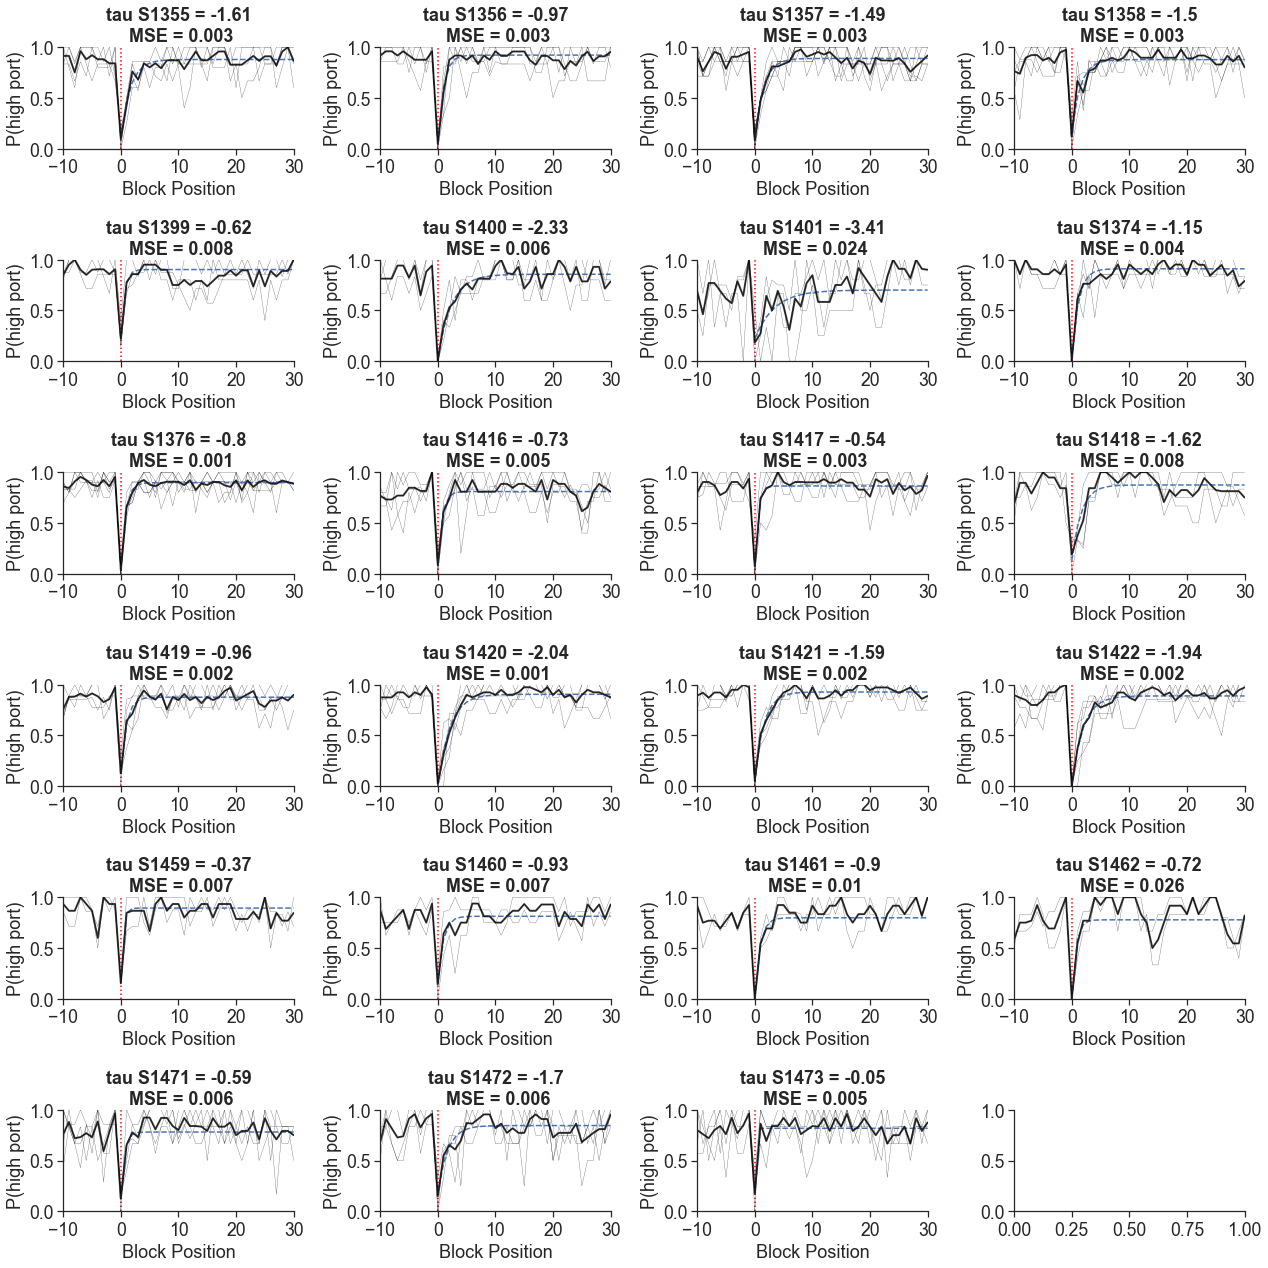

In [142]:
import scipy 
from sklearn.metrics import mean_squared_error as mse

ID, tau_phigh=[], []

fig, axs = plt.subplots(nrows=int(np.ceil(len(mice)/4)), ncols=4, figsize=(6*3, 3*int(np.ceil(len(mice)/4))))
plt.yticks([0,0.5,1.0])
sns.despine() 

for ax, mouse in zip(axs.reshape(-1), mice): 
    
    d = df[df.condition == mouse]
    ID.append(mouse)
    d_to_fit = d.loc[(d.block_pos>=0) & (d.block_pos<=30)] # change here to adjust plateau of fit
    popt, pcov = scipy.optimize.curve_fit(exponential_fixedB, d_to_fit.block_pos.values, d_to_fit.phigh.values, p0=[0,-0.5])
    #popt, pcov = scipy.optimize.curve_fit(exponential_fixedB, d.block_pos.values[30:], d.phigh.values[30:], p0=[0,-0.5])

    tau_phigh.append(1/popt[1])

    session_traces = bpos_summaries_by_condition(data.loc[data['Mouse ID']==mouse], condition='Session ID')

    for session in session_traces.condition.unique():
        
        s = session_traces.loc[session_traces.condition==session]
        ax.plot(s.block_pos,s.phigh,'-',label =None,alpha=0.7,linewidth=0.3, color='black')

    tau_phigh.append(1/popt[1])
    
    ax.plot(d.block_pos,d.phigh,'-',label =mouse,alpha=0.7,linewidth=0.8, color='black')
    ax.plot(d_to_fit.block_pos.values, exponential_fixedB(d_to_fit.block_pos.values, popt[0], popt[1]), linestyle='dashed')

    ax.plot(d.block_pos,d.phigh,'-',label =mouse,alpha=0.7,linewidth=2, color='black')
    ax.vlines(x=0,ymin=0,ymax=max(d.phigh)+0.05,linestyle='dotted', color='red')

    MSE = mse(d.phigh.values[30:], exponential_fixedB(d.block_pos.values[30:], popt[0], popt[1]))

    ax.set(xlabel='Block Position', ylabel='P(high port)', xlim=(-10,30), ylim=(0,1), title=f'tau {mouse} = {round(1/popt[1], 2)}\n MSE = {round(MSE, 3)}')

    plt.tight_layout()


In [143]:
data.head()

,Trial,blockTrial,0_ITI,0_trialDuration,Decision,1_Port,1_Reward,1_ITI,1_trialDuration,Switch,...,Mouse ID,Session ID,Condition,laser_stim,Target,Block ID,blockLength,session_pos,treatment,block_pos_rev
0,2,2,6.707,1.024,1,1,0,2.562,1.445,0,...,S1355,S1355_03172022,95-05,0,0,1.0,46,0.009852,jax,-44
1,3,3,1.646,2.080,1,1,0,6.707,1.024,0,...,S1355,S1355_03172022,95-05,0,0,1.0,46,0.014778,jax,-43
2,4,4,1.672,1.270,0,1,0,1.646,2.080,1,...,S1355,S1355_03172022,95-05,0,0,1.0,46,0.019704,jax,-42
3,5,5,6.881,1.256,1,0,1,1.672,1.270,1,...,S1355,S1355_03172022,95-05,0,0,1.0,46,0.024631,jax,-41
4,6,6,2.106,1.445,0,1,0,6.881,1.256,1,...,S1355,S1355_03172022,95-05,0,0,1.0,46,0.029557,jax,-40


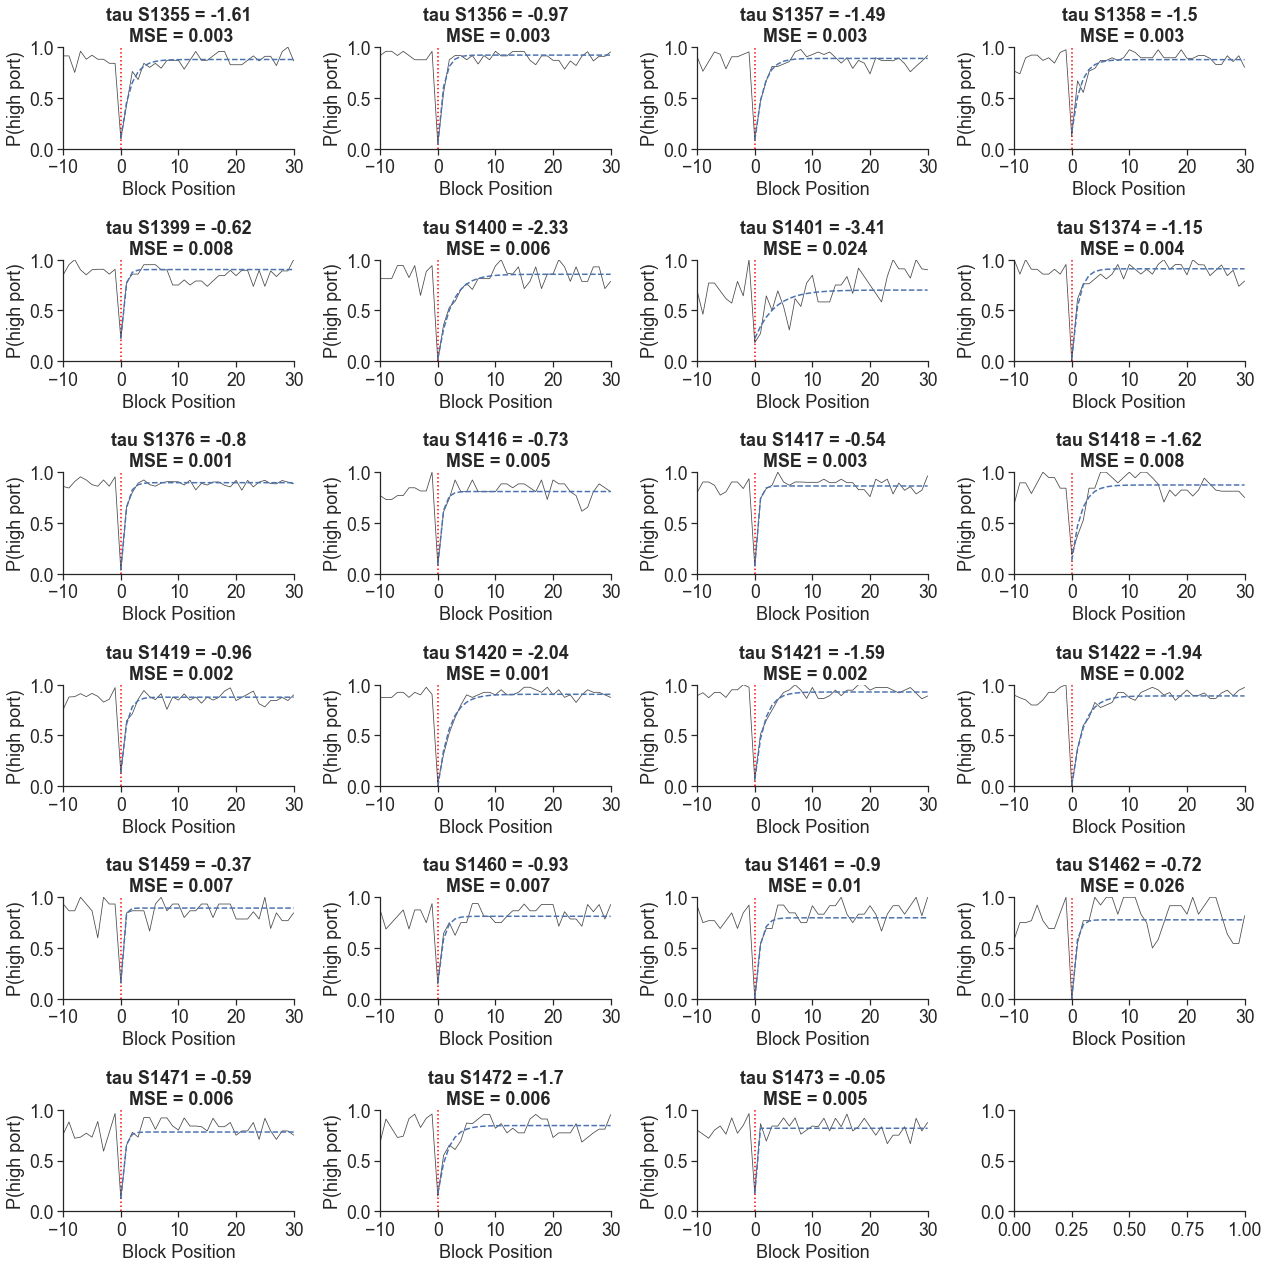

In [144]:
import scipy 
from sklearn.metrics import mean_squared_error as mse

# ID, tau_phigh=[], []
tau_summary = pd.DataFrame(columns={'Mouse', 'tau_phigh', 'treatment'})

fig, axs = plt.subplots(nrows=int(np.ceil(len(mice)/4)), ncols=4, figsize=(6*3, 3*int(np.ceil(len(mice)/4))))

for ax, mouse in zip(axs.reshape(-1), mice): 
    
    d = df[df.condition == mouse]
    ID.append(mouse)
    d_to_fit = d.loc[(d.block_pos>=0) & (d.block_pos<=30)] # change here to adjust plateau of fit
    popt, pcov = scipy.optimize.curve_fit(exponential_fixedB, d_to_fit.block_pos.values, d_to_fit.phigh.values, p0=[0,-0.5])
    #popt, pcov = scipy.optimize.curve_fit(exponential_fixedB, d.block_pos.values[30:], d.phigh.values[30:], p0=[0,-0.5])

    tau_phigh.append(1/popt[1])
    
    ax.plot(d.block_pos,d.phigh,'-',label =mouse,alpha=0.7,linewidth=0.8, color='black')
    ax.plot(d_to_fit.block_pos.values, exponential_fixedB(d_to_fit.block_pos.values, popt[0], popt[1]), linestyle='dashed')

    #ax.plot(d.block_pos.values[30:], exponential_fixedB(d.block_pos.values[30:], popt[0], popt[1]), linestyle='dashed')
    ax.vlines(x=0,ymin=0,ymax=max(d.phigh)+0.05,linestyle='dotted', color='red')

    MSE = mse(d.phigh.values[30:], exponential_fixedB(d.block_pos.values[30:], popt[0], popt[1]))

    ax.set(xlabel='Block Position', ylabel='P(high port)', xlim=(-10,30), ylim=(0,1), title=f'tau {mouse} = {round(1/popt[1], 2)}\n MSE = {round(MSE, 3)}')
    sns.despine()    
    plt.yticks([0,0.5,1.0])
    plt.tight_layout()

    tau_summary = tau_summary.append({'Mouse':mouse, 'tau_phigh':-(1/popt[1]), 'treatment':data.loc[data['Mouse ID']==mouse].treatment.unique().item()}, 
                                      ignore_index=True)

In [145]:
tau_summary

,Mouse,tau_phigh,treatment
0,S1355,1.613163,jax
1,S1356,0.967393,jax
2,S1357,1.485516,jax
3,S1358,1.501793,jax
4,S1399,0.617304,jax
5,S1400,2.328457,jax
6,S1401,3.406305,jax
7,S1374,1.150601,jax
8,S1376,0.795066,jax
9,S1416,0.733534,ko


/var/folders/92/m8dxyprj3wz2_pky27khyvxc0000gn/T/ipykernel_2338/642287214.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)


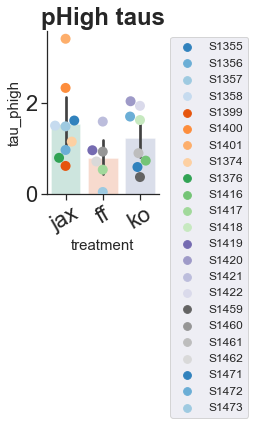

In [147]:
## Plot according to treatment group

sns.set(style='ticks', font_scale=2, rc={'axes.labelsize':15, 'axes.titlesize':15, 'axes.titleweight':'bold',\
                                         'axes.titlesize':25,'font.weight':'normal'}) 

palette = sns.color_palette("tab20c", len(tau_summary))

fig, ax = plt.subplots(figsize=(2,3))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

sns.swarmplot(x='treatment', y='tau_phigh', data=tau_summary, palette = palette, hue = mice, s = 10,  order=['jax', 'ff', 'ko'])
sns.barplot(x='treatment', y='tau_phigh', data=tau_summary, palette = "Set2", alpha=0.35,  order=['jax', 'ff', 'ko'])

# plt.xlabel('mice', fontsize = 15)
# plt.ylabel('time (sec)', fontsize = 15)

sns.set(font_scale = 2)
sns.despine()
plt.title('pHigh taus', fontweight = "bold")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', prop={'size': 12})

plt.savefig('phigh_taus.svg', dpi=200, bbox_inches="tight")


# tetanus = ['S1258', 'S1259', 'S1194', 'S1195', 'S1214']
# control = ['S1260', 'S1246', 'S1248', 'S1233', 'S1234']

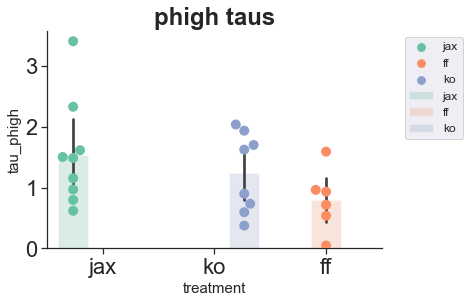

In [148]:
## Plot according to treatment group

sns.set(style='ticks', font_scale=2, rc={'axes.labelsize':15, 'axes.titlesize':15, 'axes.titleweight':'bold',\
                                         'axes.titlesize':25,'font.weight':'normal'}) 

palette = sns.color_palette("tab20c", len(tau_summary))

fig, ax = plt.subplots(figsize=(6,4))
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

sns.swarmplot(x='treatment', y='tau_phigh', data=tau_summary, palette = "Set2", hue = 'treatment', hue_order=['jax', 'ff', 'ko'], s = 10, dodge=True)
sns.barplot(x='treatment', y='tau_phigh', data=tau_summary, hue='treatment', palette = "Set2", hue_order=['jax', 'ff', 'ko'], alpha=0.25)

# plt.xlabel('mice', fontsize = 15)
# plt.ylabel('time (sec)', fontsize = 15)

sns.set(font_scale = 2)
sns.despine()
plt.title('phigh taus', fontweight = "bold")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', prop={'size': 12})
plt.savefig('phigh_taus.svg', dpi=200, bbox_inches="tight")


In [149]:
tau_summary

,Mouse,tau_phigh,treatment
0,S1355,1.613163,jax
1,S1356,0.967393,jax
2,S1357,1.485516,jax
3,S1358,1.501793,jax
4,S1399,0.617304,jax
5,S1400,2.328457,jax
6,S1401,3.406305,jax
7,S1374,1.150601,jax
8,S1376,0.795066,jax
9,S1416,0.733534,ko


In [152]:
from scipy import stats
a = tau_summary.loc[(tau_summary['treatment'] == 'ko')]
b = tau_summary.loc[(tau_summary['treatment'] == 'jax')]
s = scipy.stats.ranksums(a.loc[:,"tau_phigh"],b.loc[:,"tau_phigh"])
print(s.pvalue)
s.pvalue <0.05

0.6304275015358904


False

In [153]:
# # plotting averages across the two groups
# sns.set_style('white')
# sns.set_style('ticks')
# fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(9,4))

# # tetanus plot
# # ------------

# # get tetanus data
# data_tetanus_1 = data[data['treatment']=='tetanus']
# data_tetanus_1=data_tetanus_1.rename(columns={'Block Trial':'blockTrial', 'Current Block Length':'blockLength',\
#                           'TargetPort':'Target'})
# df=bp.get_trials_block_transitions(data_tetanus_1, divide_by='Mouse ID', include_full=True)
# df.condition.unique()
# mice = data_tetanus_1['Mouse ID'].unique()
# print(mice)

# # plot each tetanus mouse
# for i, mouse in enumerate(mice):
#     d = df[df.condition == mouse]
#     if i==0:
#         ax1.plot(d.block_pos,d.phigh,'-',label ='tetanus mice (100-0 prob)',alpha=0.5,linewidth=1, color='magenta')
#     else:
#         ax1.plot(d.block_pos,d.phigh,'-',label ='_nolegend_',alpha=0.5,linewidth=1, color='magenta')

# # plot tetanus average
# d_avg = df[['block_pos', 'phigh']].groupby('block_pos', as_index=False).mean()
# ax1.plot(d_avg.block_pos, d_avg.phigh, '-', label='_nolegend_', alpha=1, linewidth=5, color='magenta')

# # control plot
# # ------------

# # get control data
# data_control_1 = data[data['treatment']=='mcherry']
# data_control_1=data_control_1.rename(columns={'Block Trial':'blockTrial', 'Current Block Length':'blockLength',\
#                           'TargetPort':'Target'})
# df=bp.get_trials_block_transitions(data_control_1, divide_by='Mouse ID', include_full=True)
# df.condition.unique()
# mice = data_control_1['Mouse ID'].unique()
# print(mice)

# # plot each control mouse
# for i, mouse in enumerate(mice): 
#     d = df[df.condition == mouse]
#     if i==0:
#         ax1.plot(d.block_pos,d.phigh,'-',label ='control mice (95-5 prob)',alpha=0.5,linewidth=1, color='blue')
#     else:
#         ax1.plot(d.block_pos,d.phigh,'-',label ='_nolegend_',alpha=0.5,linewidth=1, color='blue')

# # plot control average
# d_avg = df[['block_pos', 'phigh']].groupby('block_pos', as_index=False).mean()
# ax1.plot(d_avg.block_pos, d_avg.phigh, '-', label='_nolegend_', alpha=1, linewidth=5, color='blue')

# # format plot
# ax1.axis('on')
# ax1.vlines(x=0,ymin=0,ymax=max(d.phigh)+0.05,linestyle='dotted', color='black')
# ax1.legend(loc=[.65,0.03], fontsize=17.7,frameon=True) #0.45 0.03
# ax1.set(xlabel='Block Position', ylabel='P(high port)', xlim=(-10,20), ylim=(0,1))
# plt.yticks([0,0.5,1.0])

# sns.despine()

# # plt.savefig('filename.png', bbox_inches = "tight", dpi = 300)

# function for plotting average pSwitch or pHighPort -/+ overlay of individual traces

In [154]:
data

,Trial,blockTrial,0_ITI,0_trialDuration,Decision,1_Port,1_Reward,1_ITI,1_trialDuration,Switch,...,Mouse ID,Session ID,Condition,laser_stim,Target,Block ID,blockLength,session_pos,treatment,block_pos_rev
0,2,2,6.707,1.024,1,1,0,2.562,1.445,0,...,S1355,S1355_03172022,95-05,0,0,1.0,46,0.009852,jax,-44
1,3,3,1.646,2.080,1,1,0,6.707,1.024,0,...,S1355,S1355_03172022,95-05,0,0,1.0,46,0.014778,jax,-43
2,4,4,1.672,1.270,0,1,0,1.646,2.080,1,...,S1355,S1355_03172022,95-05,0,0,1.0,46,0.019704,jax,-42
3,5,5,6.881,1.256,1,0,1,1.672,1.270,1,...,S1355,S1355_03172022,95-05,0,0,1.0,46,0.024631,jax,-41
4,6,6,2.106,1.445,0,1,0,6.881,1.256,1,...,S1355,S1355_03172022,95-05,0,0,1.0,46,0.029557,jax,-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22234,226,36,15.354,1.263,0,0,1,17.039,1.385,0,...,S1473,S1473_07132022,95-05,0,0,6.0,40,0.982609,ff,-4
22235,227,37,7.926,1.461,0,0,1,15.354,1.263,0,...,S1473,S1473_07132022,95-05,0,0,6.0,40,0.986957,ff,-3
22236,228,38,4.943,1.198,1,0,1,7.926,1.461,1,...,S1473,S1473_07132022,95-05,0,0,6.0,40,0.991304,ff,-2
22237,229,39,2.717,1.245,0,1,0,4.943,1.198,1,...,S1473,S1473_07132022,95-05,0,0,6.0,40,0.995652,ff,-1


In [155]:
# def average_plot(data, stat, bymouse = True):

#     data=data.rename(columns={'Block Trial':'blockTrial', 'Current Block Length':'blockLength',\
#                                 'TargetPort':'Target'})

#     treat_type = data['treatment'].unique()

#     sns.set_style('white')
#     sns.set_style('ticks')
#     fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(9,4))
#     colors = ['magenta', 'black']

#     for data_treat_type, color in zip(treat_type, colors):
#         temp_df = data[data['treatment']==data_treat_type]
#         df=bpos_summaries_by_condition(temp_df, condition='Mouse ID')
#         mice = temp_df['Mouse ID'].unique()

#         if bymouse: # option to include single traces
#             for i, mouse in enumerate(mice):
#                 d = df[df.condition == mouse]
#                 if i==0:
#                     ax1.plot(d.block_pos,d[stat],'-',label = data_treat_type ,alpha=0.3,linewidth=1, color=color)
#                 else:
#                     ax1.plot(d.block_pos,d[stat],'-',label ='_nolegend_',alpha=0.3,linewidth=1, color=color)

#         else:
#             high_error = df[['block_pos', stat]].groupby('block_pos', as_index=False).mean()

#             plt.fill_between(d.block_pos,y1=d.phigh - d.phigh_std / np.sqrt(d.n), 
#                                     y2 =d.phigh + d.phigh_std / np.sqrt(d.n),alpha=0.2, color='gray')
            
#         d_avg = df[['block_pos', stat]].groupby('block_pos', as_index=False).mean()
#         ax1.plot(d_avg.block_pos, d_avg[stat], '-', label='_nolegend_', alpha=1, linewidth=5, color=color)

        
    
#     # format plot
#     ymax1=max(df[stat])+0.05
#     ax1.axis('on')
#     ax1.vlines(x=0,ymin=0,ymax=ymax1,linestyle='dotted', color='black')
#     ax1.legend(loc=[.65,0.03], fontsize=17.7,frameon=True) #0.45 0.03
#     ax1.set(xlabel='Block Position', ylabel=stat, xlim=(-10,20), ylim=(0,ymax1))
#     sns.despine()

#     #return average_plot_summary
#     return df.sort_values(['condition', 'block_pos'])

In [156]:
def average_plot(data, stat, individual_traces=True, unit_type='Session ID'):

    data=data.rename(columns={'Block Trial':'blockTrial', 'Current Block Length':'blockLength',\
                                'TargetPort':'Target'})

    treat_type = data['treatment'].unique()

    sns.set_style('white')
    sns.set_style('ticks')
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(9,4))
    colors = ['magenta', 'black', 'blue']

    for data_treat_type, color in zip(treat_type, colors):
        temp_df = data[data['treatment']==data_treat_type]
        df=bpos_summaries_by_condition(temp_df, condition=unit_type)
        units = temp_df[unit_type].unique()

        d_avg = df[['block_pos', stat]].groupby('block_pos', as_index=False).mean()
        ax1.plot(d_avg.block_pos, d_avg[stat], '-', label=data_treat_type, alpha=1, linewidth=2, color=color)

        if individual_traces: # option to include single traces
            for i, unit in enumerate(units):
                d = df[df.condition == unit]
                ax1.plot(d.block_pos,d[stat],'-',label ='_nolegend_',alpha=0.3,linewidth=1, color=color)

        else:
            sem = (df[['block_pos', stat]].groupby('block_pos')[stat].std().values / 
                            np.sqrt(df[['block_pos', stat]].groupby('block_pos')[stat].size().values))

            plt.fill_between(d_avg.block_pos.values, y1 = d_avg[stat] - sem, y2 =d_avg[stat] + sem, alpha=0.2, color=color)
            
        
    
    # format plot
    ymax1=max(df[stat])+0.05
    ax1.axis('on')
    ax1.vlines(x=0,ymin=0,ymax=ymax1,linestyle='dotted', color='black')
    ax1.legend(loc=[.65,0.03], fontsize=17.7,frameon=True) #0.45 0.03
    ax1.set(xlabel='Block Position', ylabel=stat, xlim=(-10,20), ylim=(0,ymax1))
    sns.despine()

    #return average_plot_summary
    return df.sort_values(['condition', 'block_pos'])


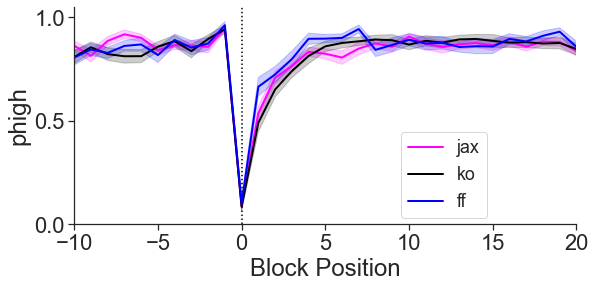

In [157]:
test_df = average_plot(data, 'phigh', individual_traces = False, unit_type='Session ID')
plt.savefig('phigh_vs_bp.svg', dpi=200, bbox_inches="tight")


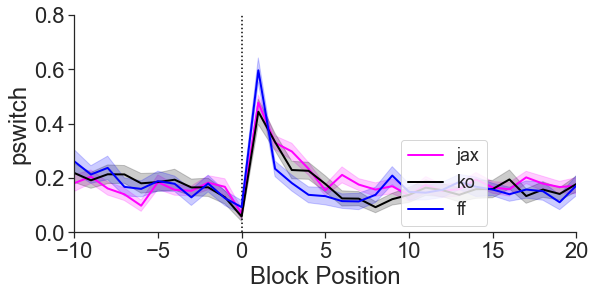

In [158]:
average_plot(data, 'pswitch', individual_traces = False, unit_type='Session ID')
plt.ylim(0, 0.8)
plt.savefig('pswitch_vs_bp.svg', dpi=200, bbox_inches="tight")

In [159]:
d.block_pos
d['block_pos']

var = 'block_pos'
d[var] # helpful to flexibly represent a column

d.var # is interpreted as d['var'] which doesn't exist

<bound method NDFrame._add_numeric_operations.<locals>.var of       block_pos     phigh  phigh_std   pswitch  pswitch_std   n condition  \
1342        -30  0.750000   0.442326  0.375000     0.494535  24     S1473   
1343        -29  0.875000   0.337832  0.375000     0.494535  24     S1473   
1344        -28  0.916667   0.282330  0.208333     0.414851  24     S1473   
1345        -27  0.875000   0.337832  0.041667     0.204124  24     S1473   
1346        -26  0.833333   0.380693  0.291667     0.464306  24     S1473   
...         ...       ...        ...       ...          ...  ..       ...   
1398         26  0.833333   0.380693  0.416667     0.503610  24     S1473   
1399         27  0.666667   0.481543  0.333333     0.481543  24     S1473   
1400         28  0.916667   0.282330  0.333333     0.481543  24     S1473   
1401         29  0.791667   0.414851  0.208333     0.414851  24     S1473   
1402         30  0.875000   0.337832  0.250000     0.442326  24     S1473   

     treatmen

# plot pSwitch

In [160]:
def get_max_pswitch(data):

    try:
        d = bpos_summaries_by_condition(data)
        d = d.loc[(d.block_pos>0)] # only block positions after transition
        max_pswitch = d.loc[d.pswitch==d.pswitch.max()].pswitch.item()
        bpos_max_pswitch = d.loc[d.pswitch==d.pswitch.max()].block_pos.item()

        return max_pswitch

    except:
        print('no max?')

In [161]:
session_traces = bpos_summaries_by_condition(data.loc[data['Mouse ID']==mouse], condition='Session ID')
session_traces = session_traces.reset_index()
session_traces

,index,block_pos,phigh,phigh_std,pswitch,pswitch_std,n,condition,treatment
0,0,-30,0.833333,0.408248,0.166667,0.408248,6,S1473_07072022,ff
1,1,-29,0.833333,0.408248,0.333333,0.516398,6,S1473_07072022,ff
2,2,-28,1.000000,0.000000,0.166667,0.408248,6,S1473_07072022,ff
3,3,-27,0.833333,0.408248,0.166667,0.408248,6,S1473_07072022,ff
4,4,-26,1.000000,0.000000,0.166667,0.408248,6,S1473_07072022,ff
...,...,...,...,...,...,...,...,...,...
239,239,26,0.833333,0.408248,0.333333,0.516398,6,S1473_07132022,ff
240,240,27,0.500000,0.547723,0.333333,0.516398,6,S1473_07132022,ff
241,241,28,0.833333,0.408248,0.333333,0.516398,6,S1473_07132022,ff
242,242,29,0.833333,0.408248,0.333333,0.516398,6,S1473_07132022,ff


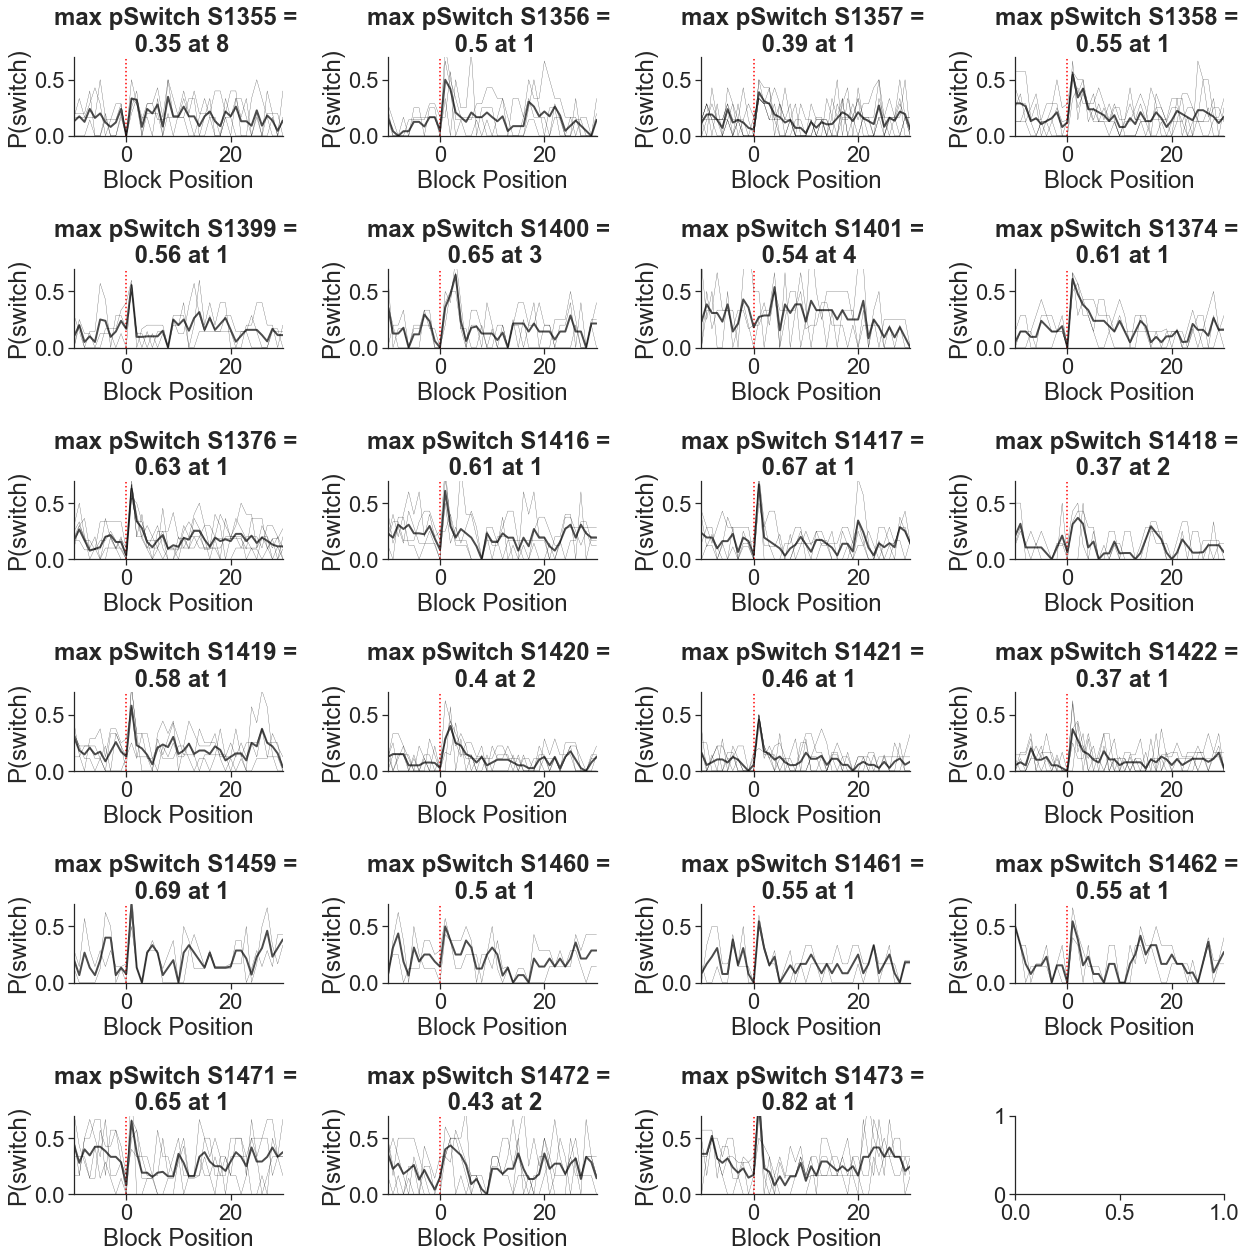

In [162]:
df=bpos_summaries_by_condition(data, condition='Mouse ID')
mice = data['Mouse ID'].unique()

maxpSwitch_summary = pd.DataFrame()

fig, axs = plt.subplots(nrows=int(np.ceil(len(mice)/4)), ncols=4, figsize=(6*3, 3*int(np.ceil(len(mice)/4))))
# plt.yticks([0,0.5,1.0])
sns.despine() 

for ax, mouse in zip(axs.reshape(-1), mice): 
    
    d = df[df.condition == mouse]
    e = d.loc[(d.block_pos>0)]
    m = e.pswitch.max()
    b = e.loc[e.pswitch==m].iloc[0].block_pos # at which block pos does the max occur

    # maxpSwitch.append(m)

    session_traces = bpos_summaries_by_condition(data.loc[data['Mouse ID']==mouse], condition='Session ID')

    for session in session_traces.condition.unique(): #this loop plots individual sessions
        
        s = session_traces.loc[session_traces.condition==session]
        ax.plot(s.block_pos,s.pswitch,'-',label =None,alpha=0.7,linewidth=0.3, color='black')

    ax.plot(d.block_pos,d.pswitch,'-',label =mouse,alpha=0.7,linewidth=2, color='black')
    ax.vlines(x=0,ymin=0,ymax=max(d.phigh)+0.05,linestyle='dotted', color='red')
    ax.set(xlabel='Block Position', ylabel='P(switch)', xlim=(-10,30), ylim=(0,0.7), title=f'max pSwitch {mouse} = \n {round(m, 2)} at {b}')

    maxpSwitch_summary = maxpSwitch_summary.append({'Mouse':mouse, 'max pSwitch':m, 'treatment':data.loc[data['Mouse ID']==mouse].treatment.unique().item()}, 
                                      ignore_index=True)
  
plt.tight_layout()
sns.despine()


# pSwitch metrics

In [163]:
maxpSwitch_summary

,Mouse,max pSwitch,treatment
0,S1355,0.347826,jax
1,S1356,0.500000,jax
2,S1357,0.388889,jax
3,S1358,0.545455,jax
4,S1399,0.555556,jax
5,S1400,0.647059,jax
6,S1401,0.538462,jax
7,S1374,0.611111,jax
8,S1376,0.627119,jax
9,S1416,0.608696,ko


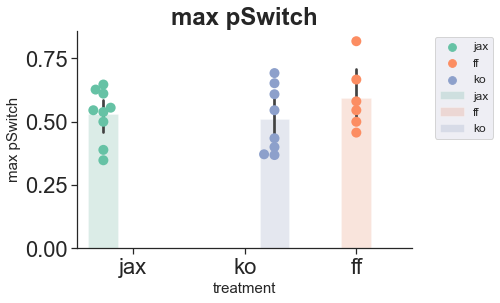

In [164]:
## Plot according to treatment group

sns.set(style='ticks', font_scale=2, rc={'axes.labelsize':15, 'axes.titlesize':15, 'axes.titleweight':'bold',\
                                         'axes.titlesize':25,'font.weight':'normal'}) 

palette = sns.color_palette("tab20c", len(maxpSwitch_summary))

fig, ax = plt.subplots(figsize=(6,4))
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

sns.swarmplot(x='treatment', y='max pSwitch', data=maxpSwitch_summary, palette = "Set2", hue = 'treatment', hue_order=['jax', 'ff', 'ko'], s = 10, dodge=True)
sns.barplot(x='treatment', y='max pSwitch', data=maxpSwitch_summary, hue='treatment', palette = "Set2", hue_order=['jax', 'ff', 'ko'], alpha=0.25)

# plt.xlabel('mice', fontsize = 15)
# plt.ylabel('time (sec)', fontsize = 15)

sns.set(font_scale = 2)
sns.despine()
plt.title('max pSwitch', fontweight = "bold")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', prop={'size': 12})
plt.savefig('maxswitch.svg', dpi=200, bbox_inches="tight")


In [167]:
a = maxpSwitch_summary.loc[(maxpSwitch_summary['treatment'] == 'ko')]
b = maxpSwitch_summary.loc[(maxpSwitch_summary['treatment'] == 'jax')]
s = scipy.stats.ranksums(a.loc[:,"max pSwitch"],b.loc[:,"max pSwitch"])
print(s.pvalue)
s.pvalue <0.05

0.8852339144732017


False

NameError: name 'full_stats' is not defined

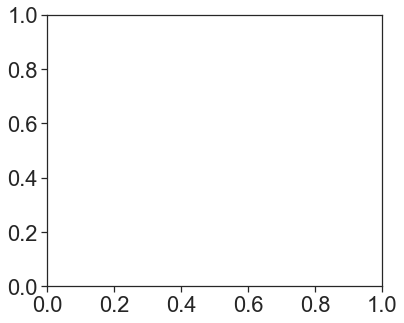

In [38]:
# plot multiple groups per stat
sns.set(style='ticks', font_scale=2, rc={'axes.labelsize':10, 'axes.titlesize':15, 'axes.titleweight':'bold',\
                                         'axes.titlesize':25,'font.weight':'normal'}) 


fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(2*3, 5)) #4*int(np.ceil(len(cols)/3)))

test_df = pd.melt(full_stats, id_vars=['treatment'], value_vars=['meanITI', 'decisionTime'])
sns.barplot(x='variable', y='value', data=test_df, hue='treatment', palette = "Set2", alpha=0.3, hue_order=['control', 'tetanus'], ax=axs)
sns.swarmplot(x='variable', y='value', data=test_df, palette = "Set2", hue = 'treatment', s = 9, hue_order=['control','tetanus'], dodge=True, ax=axs)
# sns.swarmplot(x='variable', y='value', data=test_df, palette = palette, hue = 'treatment', s = 9, hue_order=['jax', 'ff', 'ko'], dodge=True, ax=axs)
sns.swarmplot(x='variable', y='value', data=test_df, palette = "Set2", hue = 'treatment', s = 10, dodge=True)


legend = axs.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})
axs.set_xticklabels(axs.get_xticklabels(),rotation = 35)

sns.despine()

plt.tight_layout()
plt.savefig('mouse_stats3.svg', dpi=200, bbox_inches="tight")


# bootstrapping parameter estimates

In [30]:
def resampled_means(data, col, N=10000, func=np.mean, comparison=False, **kwargs):

    '''

    Resample from data to compute bootstrapped estimates of Column values using given function

    ARGUMENTS:
        data (pd.DataFrame)
        col (str or list): column to perform func on (i.e. to calculate P(Switch))
        N (int): number of repetitions
        func (function): function to apply on column to calculate bootstrapped estimate
        comparison (bool): True if comparing multiple conditions
        **kwargs:
            treatment_col (str): column header with identities of treatment/control classification
            treatment_vals (list): list of ids/labels for assignment to condition group contained within treatment column

    OUTPUTS:
        func_control (list): list of bootstrapped estimates (after resample, on col using func); if comparison is True, 
                             corresponds to control group
        func_treatment (list): as for func_control, for treatment group
        delta (list): pairwise subtraction, func_control - func_treatment

    '''

    func_control = []
    
    if comparison:

        func_treatment = []
        treatment_col = kwargs.get('treatment_col', None)
        control_val = kwargs.get('control_val', None)
        treatment_val = kwargs.get('treatment_val', None)
        # control_val, treatment_val = kwargs.get('treatment_vals', [None, None])


    for i in range(N):

        if i%100==0: print(f'starting run {i}')
        
        all_sessions = data['Session ID'].unique()
        session_ids = np.random.choice(all_sessions, size=len(all_sessions), replace=True)
        resampled_data = pd.concat([data.loc[data['Session ID']==session] for session in session_ids])

        if comparison:
            resampled_control = resampled_data.loc[resampled_data[treatment_col]==control_val]
            resampled_treatment = resampled_data.loc[resampled_data[treatment_col]==treatment_val]
            # resampled_control = resampled_data.loc[resampled_data[treatment_col].isin(control_val)] # for lists of mice
            # resampled_treatment = resampled_data.loc[resampled_data[treatment_col].isin(treatment_val)] 

            func_control.append(func(resampled_control[col]))
            func_treatment.append(func(resampled_treatment[col]))

        else:
            func_control.append(func(resampled_data[col]))
        
    if comparison:
        return func_control, func_treatment, np.array(func_treatment)-np.array(func_control)

    else:
        return func_control

In [31]:
all_sessions = data['Session ID'].unique()
session_ids = np.random.choice(all_sessions, size=len(all_sessions), replace=True)
resampled_data = pd.concat([data.loc[data['Session ID']==session] for session in session_ids])

In [32]:
len(set(session_ids)) / len(session_ids)

0.6046511627906976

In [33]:
all_sessions

array(['S732_06172020', 'S732_05312020', 'S732_06092020', 'S732_06112020',
       'S732_06152020', 'S732_06212020', 'S735_06172020', 'S735_05312020',
       'S735_06092020', 'S735_06152020', 'S735_06212020', 'S736_06172020',
       'S736_05312020', 'S736_06112020', 'S736_06152020', 'S736_06212020',
       'S776_06292020', 'S776_06252020', 'S776_07012020', 'S776_07032020',
       'S855_11242020', 'S855_11262020', 'S855_11292020', 'S857_11242020',
       'S857_11272020', 'S857_11292020', 'S1041_04072021',
       'S1041_04102021', 'S1041_04132021', 'S1042_04072021',
       'S1042_04102021', 'S1043_04072021', 'S1043_04102021',
       'S1043_04162021', 'S1044_04022021', 'S1142_06232021',
       'S1142_06252021', 'S1142_06292021', 'S1142_07062021',
       'S1143_06232021', 'S1143_06292021', 'S1143_07012021',
       'S1143_07062021'], dtype=object)

In [34]:
def tau_and_error(data, val=1):

    d = bpos_summaries_by_condition(data)
    popt, pcov = scipy.optimize.curve_fit(exponential_fixedB, d.loc[d.block_pos>=0].block_pos, 
                                            d.loc[d.block_pos>=0].phigh, p0=[0,-0.5])
    MSE = mse(d.loc[d.block_pos>=0].phigh, exponential_fixedB(d.loc[d.block_pos>=0].block_pos, popt[0], popt[1]))

    if MSE>0.07:
        val += 1
        print(val)

    return -1/popt[1]

def get_max_pswitch(data):

    try:
        d = bpos_summaries_by_condition(data)
        d = d.loc[(d.block_pos>0)] # only block positions after transition
        max_pswitch = d.pswitch.max()
        # max_pswitch = d.loc[d.pswitch==d.pswitch.max()].pswitch.item()
        # bpos_max_pswitch = d.loc[d.pswitch==d.pswitch.max()].block_pos.item()

        return max_pswitch

    except:
        print('no max?')

def get_mean_session_rewards(data):

    mean_session_rewards = np.mean(data.groupby('Session ID').Reward.mean()) 

    return mean_session_rewards

def get_mean_session_phigh(data):

    mean_session_phigh = np.mean(data.groupby('Session ID')['highPort'].mean()) 

    return mean_session_phigh

def get_lose_switch(data):

    lose_switch = data[data['1_Reward']==0].Switch.mean()

    return lose_switch

def get_win_switch(data):

    win_switch = data[data['1_Reward']==1].Switch.mean()

    return win_switch

def get_meanRight(data):

    meanRight = 1-data['Decision'].mean()

    return meanRight

In [35]:
def plot_dist_with_CI(bootstrapped_dist, label='bootstrapped dist', ax=None):

    import scipy.stats as st

    sns.set(style='ticks', font_scale=2, rc={'axes.labelsize':15, 'axes.titlesize':15, 'axes.titleweight':'bold',\
                                         'axes.titlesize':25,'font.weight':'normal'}) 
    sns.despine()
    # palette = sns.color_palette("tab20c", 2)

    if ax is None:

        fig, ax = plt.subplots(figsize=(3,3))

    CI_neg, CI_pos = st.norm.interval(alpha=0.95, loc=np.mean(bootstrapped_dist), 
                                    scale=np.std(bootstrapped_dist))

    counts = ax.hist(bootstrapped_dist, label=label)
    
    plt.legend(bbox_to_anchor=(1,1))

    max_count = counts[0].max()
    ax.fill_betweenx(y=[0,max_count+0.5*max_count], x1=CI_neg, x2=CI_pos, alpha=0.6)

    #plt.axvline(x=0, color='k', linewidth = 4)

    sns.despine()

    return ax, max_count


In [36]:
# pd.DataFrame(data={condition_column: condition, 'Mouse':data['Mouse ID'].unique(),\
#                    'nSessions':len(data['Session ID'].unique()),
#                    'meanITI': data['0_ITI'].mean(), 'stdITI':data['0_ITI'].std(), \
#                    'medITI':data['0_ITI'].median(), 'madITI':data['0_ITI'].mad(), \
#                    'lose-switch':lose_switch,'win-switch':win_switch,\
#                    'meanLeft':data['Decision'].mean(), 'meanRight':1-data['Decision'].mean(),\
#                    'pSwitch':data['Switch'].mean(), 'stderr_switch':data['Switch'].std(), \
#                    'decisionTime':data['0_trialDuration'].mean(), \
#                    'stdDecisionTime':data['0_trialDuration'].std(), \
#                    'reward_rate':data['Reward'].mean(),\
#                    'stderr_reward_rate':data['Reward'].std()/np.sqrt(len(data)),\
#                    'pHighport':data['Higher p port'].mean(), \
#                    'stderr_pHighport': data['Higher p port'].std()/np.sqrt(len(data)),\
#                    'pHighport_sess_avg':mean_session_phigh, 'std_pHighport': std_session_phigh,\
#                    'Avg_rewards_sess_avg':mean_session_rewards, 'std_rewards_sess_avg': std_session_rewards, 'treatment':data['treatment'].unique()},\
#              index=[0])

# Call function to calculate bootstrapped taus

In [37]:
data

,Trial,blockTrial,0_ITI,0_trialDuration,Decision,1_Port,1_Reward,1_ITI,1_trialDuration,Switch,...,Mouse ID,Session ID,Condition,laser_stim,Target,Block ID,blockLength,session_pos,treatment,block_pos_rev
0,2,2,6.974,1.136,1,0,1,3.675,1.216,1,...,S732,S732_06172020,90-10,0,0,1.0,57,0.004831,tetanus,-55
1,3,3,3.416,1.080,1,1,0,6.974,1.136,0,...,S732,S732_06172020,90-10,0,0,1.0,57,0.007246,tetanus,-54
2,4,4,2.492,1.245,1,1,0,3.416,1.080,0,...,S732,S732_06172020,90-10,0,0,1.0,57,0.009662,tetanus,-53
3,5,5,1.503,1.248,1,1,0,2.492,1.245,0,...,S732,S732_06172020,90-10,1,0,1.0,57,0.012077,tetanus,-52
4,6,6,2.285,1.150,1,1,0,1.503,1.248,0,...,S732,S732_06172020,90-10,0,0,1.0,57,0.014493,tetanus,-51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13208,339,18,4.565,2.104,1,1,0,3.323,1.995,0,...,S1143,S1143_07062021,95-05,0,0,9.0,23,0.988338,tetanus,-5
13209,340,19,9.822,1.654,0,1,0,4.565,2.104,1,...,S1143,S1143_07062021,95-05,0,0,9.0,23,0.991254,tetanus,-4
13210,341,20,2.740,4.291,1,0,1,9.822,1.654,1,...,S1143,S1143_07062021,95-05,0,0,9.0,23,0.994169,tetanus,-3
13211,342,21,2.907,1.677,0,1,0,2.740,4.291,1,...,S1143,S1143_07062021,95-05,0,0,9.0,23,0.997085,tetanus,-2


In [38]:
data.columns

Index(['Trial', 'blockTrial', '0_ITI', '0_trialDuration', 'Decision', '1_Port',
       '1_Reward', '1_ITI', '1_trialDuration', 'Switch', 'highPort', 'Reward',
       'Mouse ID', 'Session ID', 'Condition', 'laser_stim', 'Target',
       'Block ID', 'blockLength', 'session_pos', 'treatment', 'block_pos_rev'],
      dtype='object')

starting run 0
starting run 100
starting run 200
starting run 300
starting run 400
starting run 500
starting run 600
starting run 700
starting run 800
starting run 900
starting run 0
starting run 100
starting run 200
starting run 300
starting run 400
starting run 500
starting run 600
starting run 700
starting run 800
starting run 900
starting run 0
starting run 100
starting run 200
starting run 300
starting run 400
starting run 500
starting run 600
starting run 700
starting run 800
starting run 900


0

<Figure size 432x288 with 0 Axes>

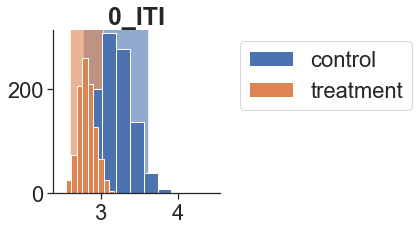

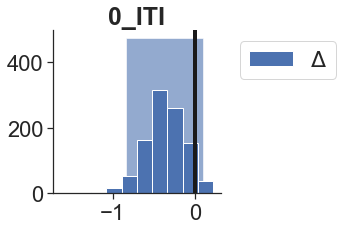

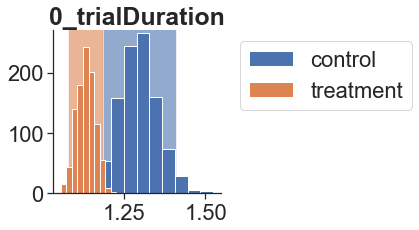

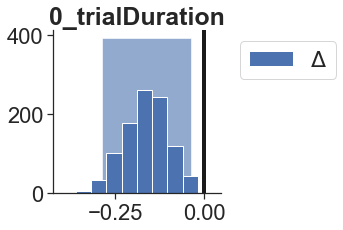

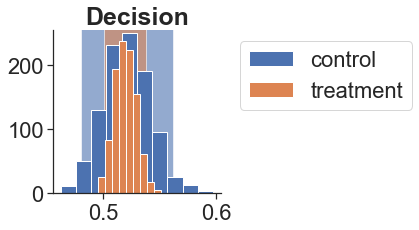

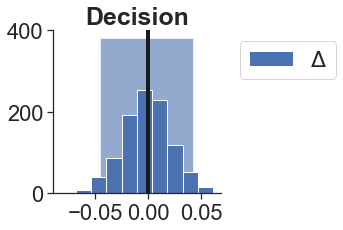

In [39]:
for col in ['0_ITI', '0_trialDuration', 'Decision']:
# Decision gets mean left data

    control_tau, ttx_tau, delta_tau = resampled_means(data, col=col, N=1000, func=np.mean, treatment_col='treatment', control_val = 'control', treatment_val = 'tetanus', comparison=True)

    ax, y1 = plot_dist_with_CI(control_tau, label='control')
    ax, y2 = plot_dist_with_CI(ttx_tau, label='treatment', ax=ax)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.title(col)
    ax.set_ylim([0,np.max((y1,y2))+5])

    ax = plot_dist_with_CI(delta_tau, label='$\Delta$')
    plt.axvline(x=0, color='k', linewidth = 4)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.title(col)

os.system('say "script done"')

In [ ]:
# # ITI    
# control_tau, ttx_tau, delta_tau = resampled_means(data, col='0_ITI', N=100, func=np.mean, treatment_col='treatment', \
#     control_val = 'control', treatment_val = 'tetanus', comparison=True)

# ax, y1 = plot_dist_with_CI(control_tau, label='control')
# ax, y2 = plot_dist_with_CI(ttx_tau, label='treatment', ax=ax)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax.set_ylim([0,np.max((y1,y2))+5])

# ax = plot_dist_with_CI(delta_tau, label='$\Delta$')
# plt.axvline(x=0, color='k', linewidth = 4)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# os.system('say "script done"')

In [ ]:
# # decision time    
# control_tau, ttx_tau, delta_tau = resampled_means(data, col='0_trialDuration', N=1000, func=np.mean, treatment_col='treatment', \
#     control_val = 'ff', treatment_val = 'ko', comparison=True)
# ax, y1 = plot_dist_with_CI(control_tau, label='control')
# ax, y2 = plot_dist_with_CI(ttx_tau, label='ttx', ax=ax)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax.set_ylim([0,np.max((y1,y2))+5])

# ax = plot_dist_with_CI(delta_tau, label='$\Delta$')
# plt.axvline(x=0, color='k', linewidth = 4)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# os.system('say "script done"')

In [ ]:
# # mean L  
# control_tau, ttx_tau, delta_tau = resampled_means(data, col='Decision', N=100, func=np.mean, treatment_col='treatment', \
#     control_val = 'control', treatment_val = 'tetanus', comparison=True)    

# ax, y1 = plot_dist_with_CI(control_tau, label='control')
# ax, y2 = plot_dist_with_CI(ttx_tau, label='ttx', ax=ax)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax.set_ylim([0,np.max((y1,y2))+5])

# ax = plot_dist_with_CI(delta_tau, label='$\Delta$')
# plt.axvline(x=0, color='k', linewidth = 4)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# os.system('say "script done"')

In [ ]:
# # mean R
# control_tau, ttx_tau, delta_tau = resampled_means(data, col=data.columns, N=1000, func=get_meanRight, treatment_col='treatment', \
#     control_val = 'control', treatment_val = 'tetanus', comparison=True)

# ax, y1 = plot_dist_with_CI(control_tau, label='control')
# ax, y2 = plot_dist_with_CI(ttx_tau, label='ttx', ax=ax)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax.set_ylim([0,np.max((y1,y2))+5])

# ax = plot_dist_with_CI(delta_tau, label='$\Delta$')
# plt.axvline(x=0, color='k', linewidth = 4)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# os.system('say "script done"')

In [ ]:
# mean reward rate 
control_tau, ttx_tau, delta_tau = resampled_means(data, col=data.columns, N=1000, func=get_mean_session_rewards, treatment_col='treatment', \
    control_val = 'ff', treatment_val = 'ko', comparison=True)

ax, y1 = plot_dist_with_CI(control_tau, label='control')
ax, y2 = plot_dist_with_CI(ttx_tau, label='ttx', ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_ylim([0,np.max((y1,y2))+5])
plt.savefig('mean_rew_rate_bootstrap1.svg', dpi=200, bbox_inches="tight")

ax = plot_dist_with_CI(delta_tau, label='$\Delta$')
plt.axvline(x=0, color='k', linewidth = 4)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig('mean_rew_rate_bootstrap2.svg', dpi=200, bbox_inches="tight")
plt.title('mean reward rate')
os.system('say "script done"')

In [ ]:
# phighport rate
# control_tau, ttx_tau, delta_tau = resampled_means(data, col=data.columns, N=1000, func=get_mean_session_phigh, treatment_col='treatment', \
#     control_val = 'control', treatment_val = 'tetanus', comparison=True)  

# ax, y1 = plot_dist_with_CI(control_tau, label='control')
# ax, y2 = plot_dist_with_CI(ttx_tau, label='ttx', ax=ax)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax.set_ylim([0,np.max((y1,y2))+5])

# ax = plot_dist_with_CI(delta_tau, label='$\Delta$')
# plt.axvline(x=0, color='k', linewidth = 4)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# os.system('say "script done"')

In [ ]:
# lose switch rate
control_tau, ttx_tau, delta_tau = resampled_means(data, col=data.columns, N=1000, func=get_lose_switch, treatment_col='treatment', \
    control_val = 'ff', treatment_val = 'ko', comparison=True) 

ax, y1 = plot_dist_with_CI(control_tau, label='control')
ax, y2 = plot_dist_with_CI(ttx_tau, label='tetanus', ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_ylim([0,np.max((y1,y2))+5])

ax = plot_dist_with_CI(delta_tau, label='$\Delta$')
plt.axvline(x=0, color='k', linewidth = 4)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('lose switch rate')
os.system('say "script done"')

In [ ]:
# win switch rate
control_tau, ttx_tau, delta_tau = resampled_means(data, col=data.columns, N=1000, func=get_win_switch, treatment_col='treatment', \
    control_val = 'ff', treatment_val = 'ko', comparison=True) 

ax, y1 = plot_dist_with_CI(control_tau, label='control')
ax, y2 = plot_dist_with_CI(ttx_tau, label='tetanus', ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_ylim([0,np.max((y1,y2))+5])

ax = plot_dist_with_CI(delta_tau, label='$\Delta$')
plt.axvline(x=0, color='k', linewidth = 4)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('win switch rate')
os.system('say "script done"')

In [ ]:
# phigh taus
control_tau, ttx_tau, delta_tau = resampled_means(data, col=data.columns, N=1000, func=tau_and_error, treatment_col='treatment', \
    control_val = 'ff', treatment_val = 'ko', comparison=True) 

ax, y1 = plot_dist_with_CI(control_tau, label='control')
ax, y2 = plot_dist_with_CI(ttx_tau, label='ttx', ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_ylim([0,np.max((y1,y2))+5])

ax = plot_dist_with_CI(delta_tau, label='$\Delta$')
plt.axvline(x=0, color='k', linewidth = 4)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('phigh taus')
os.system('say "script done"')

In [ ]:
#maxpswitch
control_tau, ttx_tau, delta_tau = resampled_means(data, col=data.columns, N=1000, func=get_max_pswitch, treatment_col='treatment', \
    control_val = 'ff', treatment_val = 'ko', comparison=True) 

ax, y1 = plot_dist_with_CI(control_tau, label='control')
ax, y2 = plot_dist_with_CI(ttx_tau, label='ttx', ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_ylim([0,np.max((y1,y2))+5])

ax = plot_dist_with_CI(delta_tau, label='$\Delta$')
plt.axvline(x=0, color='k', linewidth = 4)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('max pswitch')
os.system('say "script done"')

In [ ]:
os.system('say "script done"')

# % recovered to threshold

In [ ]:
# threshold = 0.7

# post_block_transition = df.loc[(df.block_pos>=0) & (df.phigh>=threshold)] # mask of trials following block transition that pass threshold

# first_bpos_to_threshold = post_block_transition.groupby('condition').nth(0).block_pos.values

In [ ]:
# post_block_transition.groupby('condition').nth(0)

In [ ]:
# data['block_pos_rev']=data['blockTrial']-data['blockLength']

# stable_window_length = 10
# stable_window = data[data.block_pos_rev.isin(np.arange(-1,-stable_window_length,-1))]

# stable_phigh=stable_window['Higher p port'].mean()
# stable_phigh_sem = stable_window['Higher p port'].std()/np.sqrt(len(stable_window))

# print(f'Mean rate of phigh selection ({stable_window_length} trials) prior to block transition: {round(stable_phigh,2)}')
# print(f'Standard deviation of phigh selection ({stable_window_length} trials) prior to block transition: {round(stable_phigh_sem,2)}')


# stable_switch=stable_window['Switch'].mean()
# stable_switch_sem = stable_window['Switch'].std()/np.sqrt(len(stable_window))

# print(f'Mean rate of switching ({stable_window_length} trials) prior to block transition: {round(stable_switch,2)}')
# print(f'Standard deviation of switching ({stable_window_length} trials) prior to block transition: {round(stable_switch_sem,2)}')

# % rolling window to calculate p(high) and p(switch)

In [ ]:
# rolling_phigh = data['Higher p port'].rolling(5, center=True).mean()

In [ ]:
# plt.hist(resampled_means(data.loc[data.blockTrial==7], col='Higher p port', N=100)

In [ ]:
# delta_df = pd.DataFrame(columns={'block_pos', 'deltas', 'control', 'treatment'})

# for trial in range(10):

#     bpos_means = resampled_means(data, col='Higher p port', treatment_col='Mouse ID', 
#                                     treatment_vals=[control, tetanus], comparison=True, N=1000)

#     a, b, deltas = resampled_means(data.loc[data.blockTrial==trial], col='Higher p port', treatment_col='Mouse ID', 
#                                     treatment_vals=[control, tetanus], comparison=True, N=1000)

    

#     delta_df = delta_df.append(pd.DataFrame({'block_pos':np.repeat(trial, len(deltas)), 'deltas':deltas, 'control':a, 'treatment':b}), ignore_index=True)   

In [ ]:
# fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios':(3,1)})

# sns.lineplot(x='block_pos', y='control', data=delta_df, ci=95, ax=ax1, label='control')
# sns.lineplot(x='block_pos', y='treatment', data=delta_df, ci=95, ax=ax1, label='treatment')
# ax1.set(ylabel='P(high port)')

# fig = sns.lineplot(x='block_pos', y='deltas', data=delta_df, ci=95, ax=ax2, color='gray')
# fig.axhline(0, color='k', linestyle='dashed')